# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/dlcourse2018_students

Fall Semester 2018

## Libraries

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

## Data preparation

To get MNIST data we use the function fetch_mldata, in the datasets package. Let's get all the dataset, and then we will select only the digits we want.

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
Xinput_,yinput_ = mnist["data"], mnist["target"]

In [4]:
Xinput_.shape

(70000, 784)

In [5]:
yinput_.shape

(70000,)

To know how many digits we have we can run this simple code

In [6]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(yinput_ == i), "times")

digit 0 appear 6903 times
digit 1 appear 7877 times
digit 2 appear 6990 times
digit 3 appear 7141 times
digit 4 appear 6824 times
digit 5 appear 6313 times
digit 6 appear 6876 times
digit 7 appear 7293 times
digit 8 appear 6825 times
digit 9 appear 6958 times


In [7]:
total = 0
for i in range(2):
    print ("digit", i, "makes", np.around(np.count_nonzero(yinput_ == i)/70000.0*100.0, decimals=1), "% of the 70000 observations")

digit 0 makes 9.9 % of the 70000 observations
digit 1 makes 11.3 % of the 70000 observations


# Select only digits 1 and 2

In [8]:
Xinput = Xinput_[np.any([yinput_ == 1,yinput_ == 2], axis = 0)]
yinput = yinput_[np.any([yinput_ == 1,yinput_ == 2], axis = 0)]

As usual we need to rescale the labels

In [9]:
yinput = yinput - 1

In [10]:
total = 0
for i in range(0,2,1):
    print ("Label", i, "makes", np.around(np.count_nonzero(yinput == i)/14867.0*100.0, decimals=1), "% of the 14867 observations")

Label 0 makes 53.0 % of the 14867 observations
Label 1 makes 47.0 % of the 14867 observations


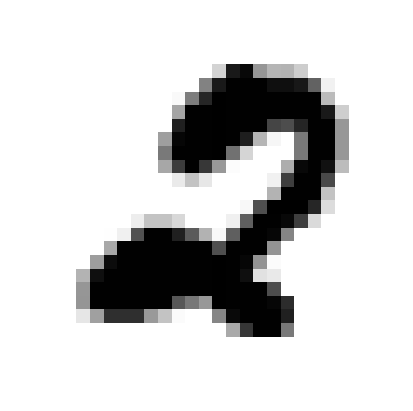

In [22]:
some_digit = Xinput[8999,:]

some_digit_image = some_digit.reshape(28,28)

plt.figure(figsize=(10,7))
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [12]:
print(Xinput.shape)
print(yinput.shape)

(14867, 784)
(14867,)


# Manual data analysis

Now let's check how our data is looking at after transforming the 2-D images into a 1-D vectors, that have 784 components (remember that our images are 28x28).

Text(0.5,0,'Pixel Number')

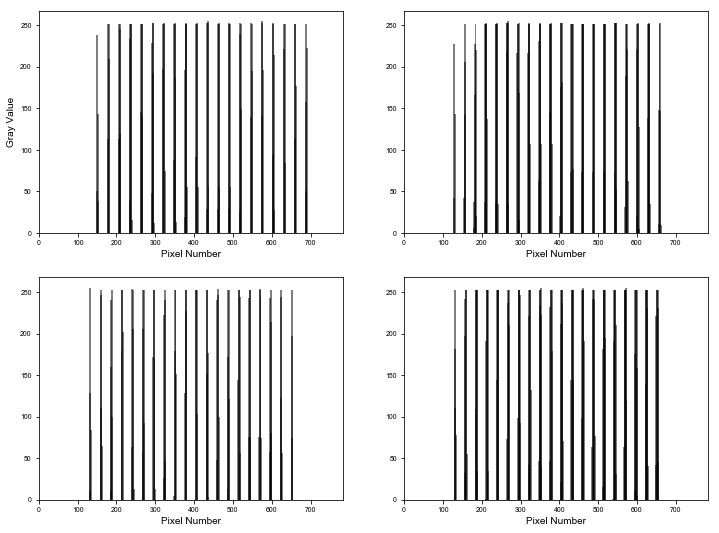

In [26]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(2, 2, 1)
plt.bar(x=np.arange(0,784,1),height=Xinput[555,:], color = 'black', alpha = 0.5, width = 5.0)
#ax.set_ylim(0,6)
ax.set_xlim(0, 784)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')

ax = fig.add_subplot(2, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[879,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')

ax = fig.add_subplot(2, 2, 3)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[78,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')

ax = fig.add_subplot(2, 2, 4)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[111,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')



Is very interesting to note that all images look the same. Even without knowing what digit they are is rather simple to recognize that they must be the same digit!

### Another example of digit 1

Text(0,0.5,'Gray Value')

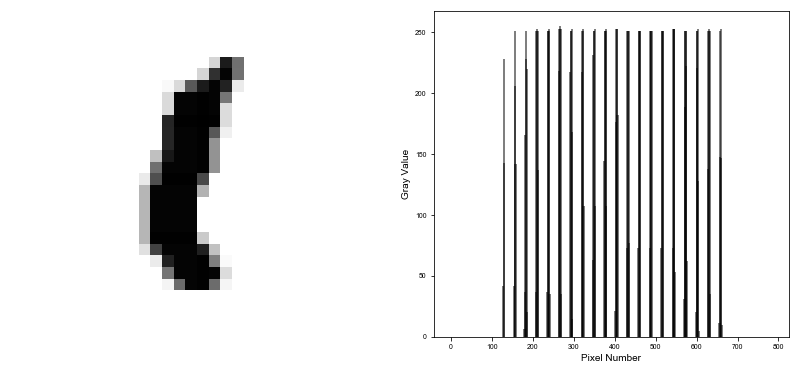

In [30]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1)

some_digit = Xinput[879,:]
some_digit_image = some_digit.reshape(28,28)

ax.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

ax = fig.add_subplot(1, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
plt.bar(x=np.arange(0,784,1),height=Xinput[879,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')



### Digit 2

Now let's have a look at digit 2 and how it differs from digit 1

Text(0,0.5,'Gray Value')

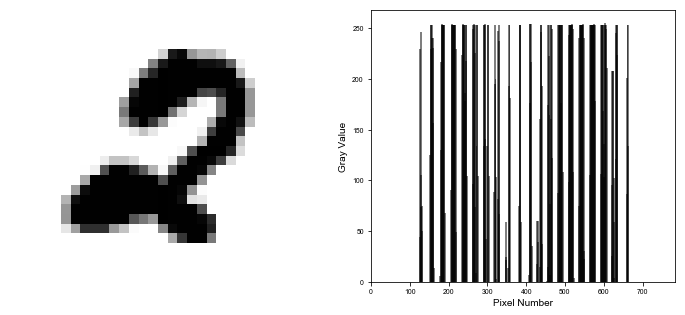

In [50]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 2, 1)

some_digit = Xinput[8999,:]
some_digit_image = some_digit.reshape(28,28)

ax.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

ax = fig.add_subplot(1, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[8999,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')


### Let's check some 2s

In [59]:
np.where(yinput == 1)

(array([ 6742,  6743,  6744, ..., 14864, 14865, 14866], dtype=int64),)

Text(0.5,0,'Pixel Number')

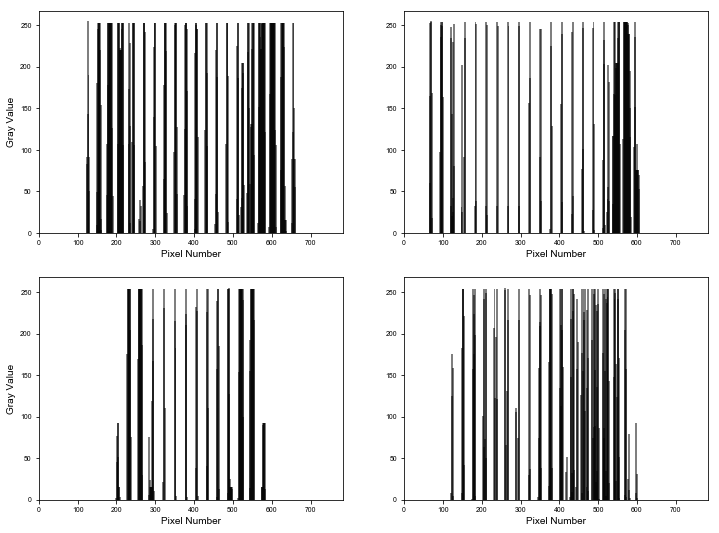

In [68]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(2, 2, 1)
plt.bar(x=np.arange(0,784,1),height=Xinput[6744,:], color = 'black', alpha = 0.5, width = 5.0)
#ax.set_ylim(0,6)
ax.set_xlim(0, 784)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')

ax = fig.add_subplot(2, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[7465,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')

ax = fig.add_subplot(2, 2, 3)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[8675,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')
ax.set_ylabel('Gray Value')

ax = fig.add_subplot(2, 2, 4)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[9857,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number')


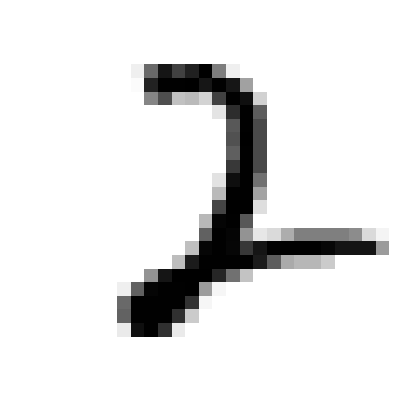

In [71]:
some_digit = Xinput[7665,:]

some_digit_image = some_digit.reshape(28,28)
plt.figure(figsize=(12,7))

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

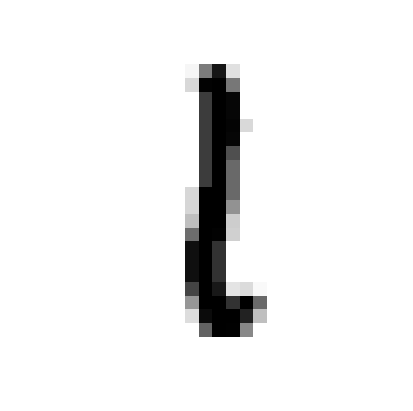

In [72]:
some_digit = Xinput[123,:]

some_digit_image = some_digit.reshape(28,28)
plt.figure(figsize=(12,7))
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

# Distributions of gray values

Now is very instructive to study the distributions of gray values in the different digits to see what we can learn

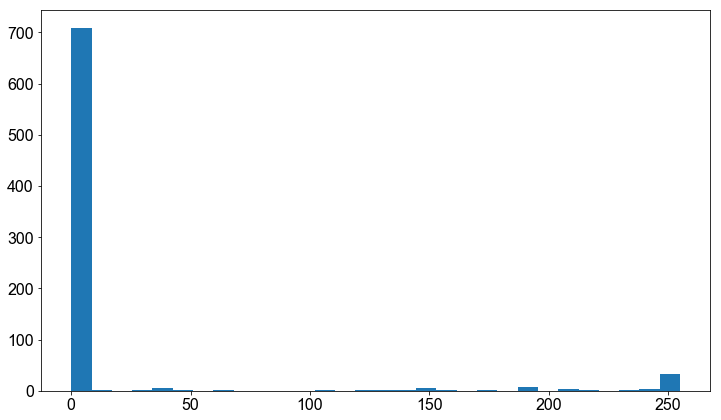

In [75]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.figure(figsize=(12,7))
plt.hist(Xinput[123,:], bins = 30) # This is a one
plt.tick_params(labelsize=16)
plt.show()

as expected we get lots of white pixels. But that does not tell us much, it actually hide the real useful information. So let's remove the really white pixel from the histogram

In [85]:
digone = Xinput[123,:]
digtwo = Xinput[7665,:]
digone = digone[digone > 5]
digtwo = digtwo[digtwo > 5]

print (Xinput[123,:].shape)
print (digone.shape)
print(digtwo.shape)

(784,)
(77,)
(132,)


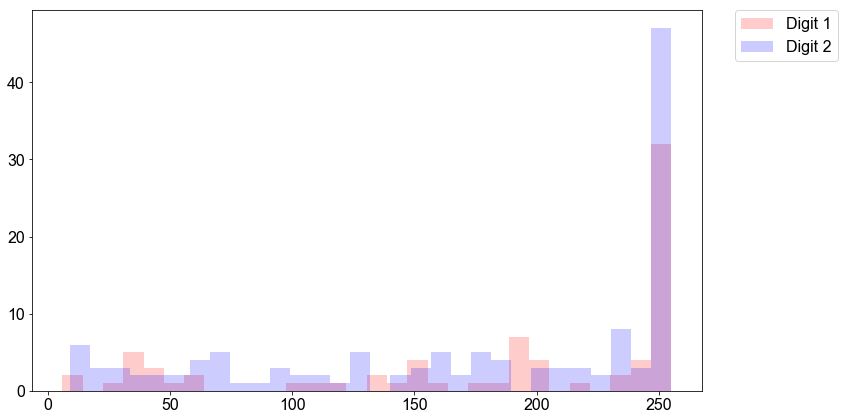

In [96]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.figure(figsize=(12,7))
plt.hist(digone, bins = 30, alpha = 0.2, color = 'red', label = 'Digit 1')
plt.hist(digtwo, bins = 30, alpha = 0.2, color = 'blue', label = 'Digit 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)
plt.show()

We can see that the two digits are slightly different but we cannot really use it to our advantage.

# Two new features

Let's define two new features that will allow us to distinguish between a one and a two. Consider the following digit 2 plotted as a 1-d Vector

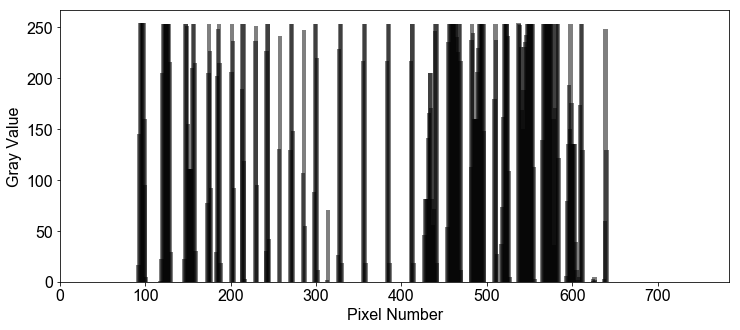

In [101]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)

some_digit = Xinput[9000,:]
some_digit_image = some_digit.reshape(28,28)

#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[9000,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.tick_params(labelsize=16)

You will notice how there are more peaks between 100 and 300 and between 450 and 650. Let's define new features

In [117]:
left = np.sum(Xinput[:,100:300], axis = 1)
right = np.sum(Xinput[:,450:650], axis = 1)

Now let's see how they differ between ones and twos

In [118]:
leftones = left[yinput == 0]
lefttwos = left[yinput == 1]

rightones = right[yinput == 0]
righttwos =  right[yinput == 1]

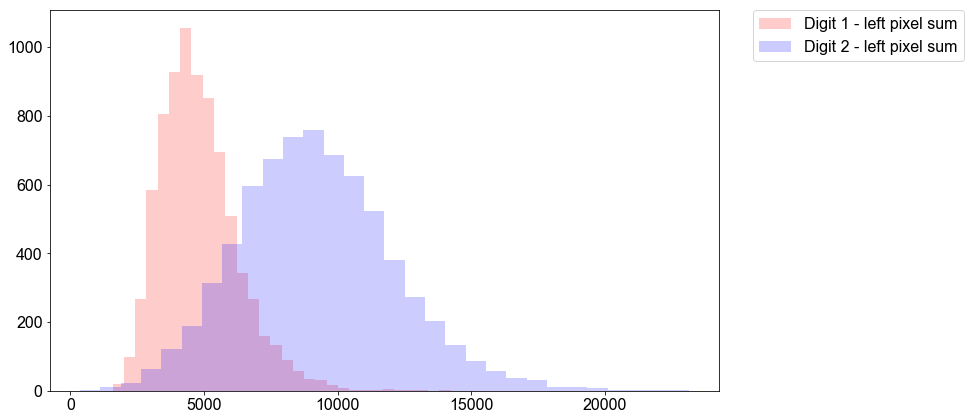

In [119]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.figure(figsize=(12,7))
plt.hist(leftones, bins = 30, alpha = 0.2, color = 'red', label = 'Digit 1 - left pixel sum')
plt.hist(lefttwos, bins = 30, alpha = 0.2, color = 'blue', label = 'Digit 2 - left pixel sum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)
plt.show()

Now we clearly see a difference! Let's check the right part

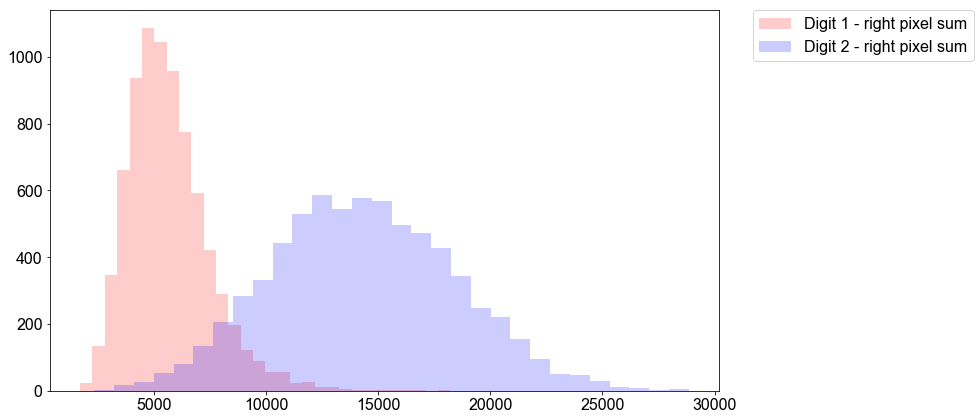

In [120]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.figure(figsize=(12,7))
plt.hist(rightones, bins = 30, alpha = 0.2, color = 'red', label = 'Digit 1 - right pixel sum')
plt.hist(righttwos, bins = 30, alpha = 0.2, color = 'blue', label = 'Digit 2 - right pixel sum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)
plt.show()

So even here there is a clear difference. Now let's try to use this information to detect ones and twos.

## Predictions

We could decide that if the value of ```left``` lies below 7500 is a one and if above is a two.

In [129]:
pred = left > 6500

In [130]:
np.mean(pred == yinput)

0.85894935091141456

and simply in this way we get ca. 86% accuarcy!

let's now use also the right information.

In [131]:
pred2 = right > 7500

In [132]:
np.mean(pred2 == yinput)

0.90892580883836682

Here is even better! We get up to 90% accuarcy.

Now we could use both informations

In [133]:
pred = (left > 6500) & (right > 7500)

In [134]:
np.mean(pred2 == yinput)

0.90892580883836682

Out of curiosity we could try to find the best values for example for the right sum of pixels

In [139]:
chosen_value = 0
accuracy = 0
for i in range (0, yinput.shape[0]):
    pred = right > i
    accuracy_ = np.mean(pred == yinput)
    if (accuracy_ > accuracy ):
        accuracy = accuracy_
        chosen_value = i
        
print ('i', chosen_value)
print('accuracy', accuracy)

i 8944
accuracy 0.931862514293


nice accuracy. Now let's try the left side

In [140]:
chosen_value = 0
accuracy = 0
for i in range (0, yinput.shape[0]):
    pred = left > i
    accuracy_ = np.mean(pred == yinput)
    if (accuracy_ > accuracy ):
        accuracy = accuracy_
        chosen_value = i
        
print ('i', chosen_value)
print('accuracy', accuracy)

i 6539
accuracy 0.85962198157


# Conclusions

Simply summing the gray values on the right side of the image we can detect the digits with an accuracy of 93%. Without any machine learning algorithm.

Remember: check the data and learn how it is structured! Then you can design the right model!